In [1]:
from data.DataPreprocessing import *
from algorithm.KFold import *
from algorithm.KNN import *
from evaluation.EvaluationMetrics import *

In [2]:
# Load dataset
dataset = LoadData() 
# menampilkan dataset
print ("\n\t\t============================HASIL IMPORT DATASET============================") 
print (dataset)


		============================HASIL IMPORT DATASET============================
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     Ma

In [3]:
# informasi kolom  dataset
print("\n\t\t============================INFORMASI KOlOM DATASET============================")
dataset.info()


		============================INFORMASI KOlOM DATASET============================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
# menampilkan informasi kolom kategorikal (object)
print("\n\t\t============================INFORMASI KOlOM KATEGORIKAL============================")
PrintColumnKategorical(dataset)


		============================INFORMASI KOlOM KATEGORIKAL============================
Kolom : Sex
		 M 	:  725  data
		 F 	:  193  data
	 2  Nilai
Kolom : ChestPainType
		 ASY 	:  496  data
		 NAP 	:  203  data
		 ATA 	:  173  data
		 TA 	:  46  data
	 4  Nilai
Kolom : RestingECG
		 Normal 	:  552  data
		 LVH 	:  188  data
		 ST 	:  178  data
	 3  Nilai
Kolom : ExerciseAngina
		 N 	:  547  data
		 Y 	:  371  data
	 2  Nilai
Kolom : ST_Slope
		 Flat 	:  460  data
		 Up 	:  395  data
		 Down 	:  63  data
	 3  Nilai


In [5]:
# encoding nilai kategorikal menjadi numerikal
dataset = LabelEncode(dataset) 
# menampilkan dataset yang telah diencoding
print ("\n\t\t============================HASIL ENCODING DATASET============================")
print (dataset)


		============================HASIL ENCODING DATASET============================
     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    1              1        140          289          0           1   
1     49    0              2        160          180          0           1   
2     37    1              1        130          283          0           2   
3     48    0              0        138          214          0           1   
4     54    1              2        150          195          0           1   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    1              3        110          264          0           1   
914   68    1              0        144          193          1           1   
915   57    1              0        130          131          0           1   
916   57    0              1        130          236          0           0   
917   38    1              2        138          

In [6]:
 # Normalisasi dataset
dataset = MinMax(dataset) 
# menampilkan dataset yang telah dinormalisasi
print ("\n\t\t============================HASIL NORMALISASI DATA DENGAN MINMAX============================")
print (dataset)


		============================HASIL NORMALISASI DATA DENGAN MINMAX============================
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.24  1.0           0.33       0.70         0.48        0.0         0.5   
1    0.43  0.0           0.67       0.80         0.30        0.0         0.5   
2    0.18  1.0           0.33       0.65         0.47        0.0         1.0   
3    0.41  0.0           0.00       0.69         0.35        0.0         0.5   
4    0.53  1.0           0.67       0.75         0.32        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.35  1.0           1.00       0.55         0.44        0.0         0.5   
914  0.82  1.0           0.00       0.72         0.32        1.0         0.5   
915  0.59  1.0           0.00       0.65         0.22        0.0         0.5   
916  0.59  0.0           0.33       0.65         0.39        0.0         0.0   
917  0.20  1.0          

In [7]:
#inisiasi variabel fold
n_split = 9 #menentukan jumlah lipatan
fold = []
#split datafold
fold = SplitFold(dataset, n_split)
#inisiasi 6 K berbeda
k = [3,5,7,9,11,13]
maks_K = np.max(k)
#inisiasi variabel metrik evaluasi bernilai 0
avg_accuracy = avg_precission = avg_recall = avg_f1 = 0
metrics = 0
k_total = 0


		============================DATA TRAINING KE-0============================
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
102  0.24  0.0           0.00       0.75         0.65        0.0         0.5   
103  0.24  1.0           0.00       0.60         0.77        1.0         0.5   
104  0.37  1.0           0.00       0.59         0.31        0.0         0.5   
105  0.59  1.0           0.33       0.70         0.43        1.0         0.5   
106  0.41  0.0           0.00       0.60         0.42        0.0         1.0   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.35  1.0           1.00       0.55         0.44        0.0         0.5   
914  0.82  1.0           0.00       0.72         0.32        1.0         0.5   
915  0.59  1.0           0.00       0.65         0.22        0.0         0.5   
916  0.59  0.0           0.33       0.65         0.39        0.0         0.0   
917  0.20  1.0           0.67       0.69  

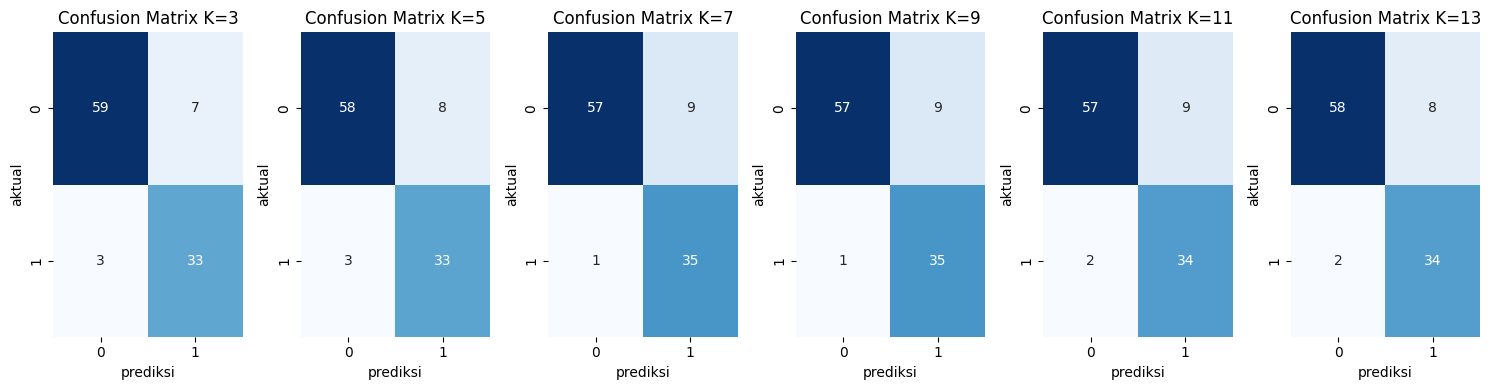



		============================METRIC EVALUASI DATA FOLD KE-0============================
    k  akurasi  presisi  recall    f1
0   3     0.90     0.82    0.92  0.87
1   5     0.89     0.80    0.92  0.86
2   7     0.90     0.80    0.97  0.88
3   9     0.90     0.80    0.97  0.88
4  11     0.89     0.79    0.94  0.86
5  13     0.90     0.81    0.94  0.87


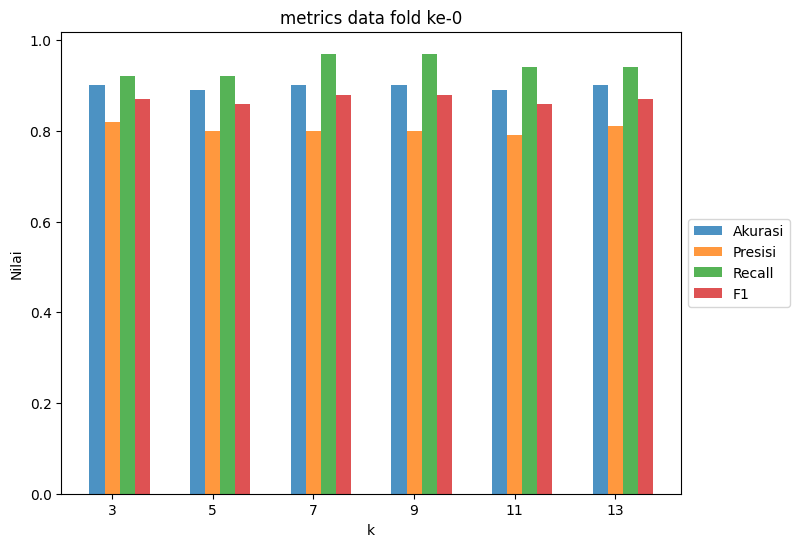


		============================DATA TRAINING KE-1============================
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.24  1.0           0.33       0.70         0.48        0.0         0.5   
1    0.43  0.0           0.67       0.80         0.30        0.0         0.5   
2    0.18  1.0           0.33       0.65         0.47        0.0         1.0   
3    0.41  0.0           0.00       0.69         0.35        0.0         0.5   
4    0.53  1.0           0.67       0.75         0.32        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.35  1.0           1.00       0.55         0.44        0.0         0.5   
914  0.82  1.0           0.00       0.72         0.32        1.0         0.5   
915  0.59  1.0           0.00       0.65         0.22        0.0         0.5   
916  0.59  0.0           0.33       0.65         0.39        0.0         0.0   
917  0.20  1.0           0.67       0.69  

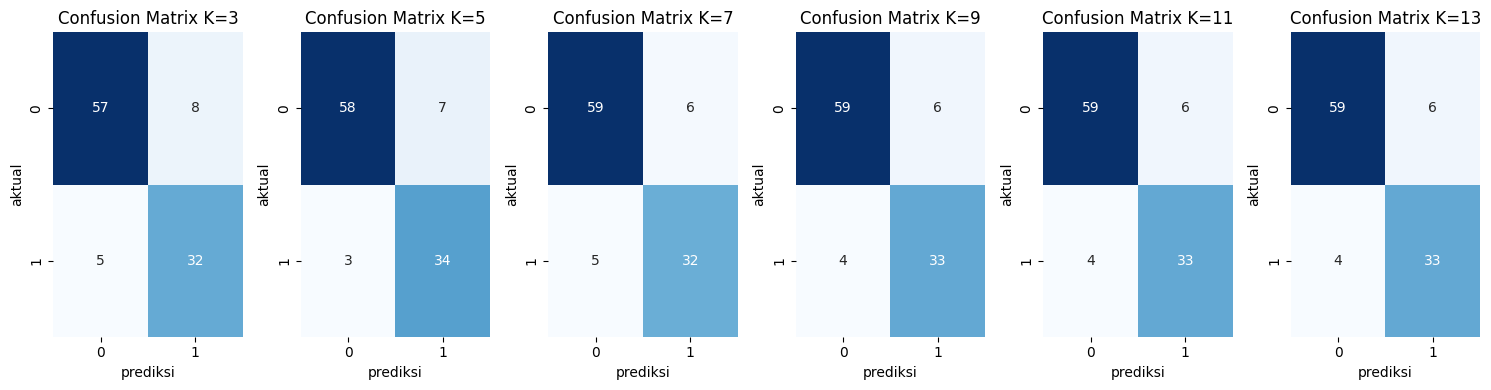



		============================METRIC EVALUASI DATA FOLD KE-1============================
    k  akurasi  presisi  recall    f1
0   3     0.87     0.80    0.86  0.83
1   5     0.90     0.83    0.92  0.87
2   7     0.89     0.84    0.86  0.85
3   9     0.90     0.85    0.89  0.87
4  11     0.90     0.85    0.89  0.87
5  13     0.90     0.85    0.89  0.87


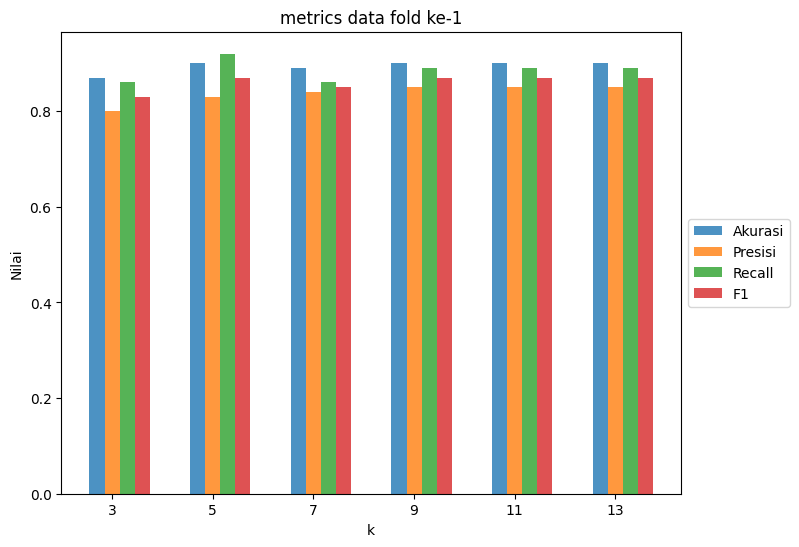


		============================DATA TRAINING KE-2============================
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.24  1.0           0.33       0.70         0.48        0.0         0.5   
1    0.43  0.0           0.67       0.80         0.30        0.0         0.5   
2    0.18  1.0           0.33       0.65         0.47        0.0         1.0   
3    0.41  0.0           0.00       0.69         0.35        0.0         0.5   
4    0.53  1.0           0.67       0.75         0.32        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.35  1.0           1.00       0.55         0.44        0.0         0.5   
914  0.82  1.0           0.00       0.72         0.32        1.0         0.5   
915  0.59  1.0           0.00       0.65         0.22        0.0         0.5   
916  0.59  0.0           0.33       0.65         0.39        0.0         0.0   
917  0.20  1.0           0.67       0.69  

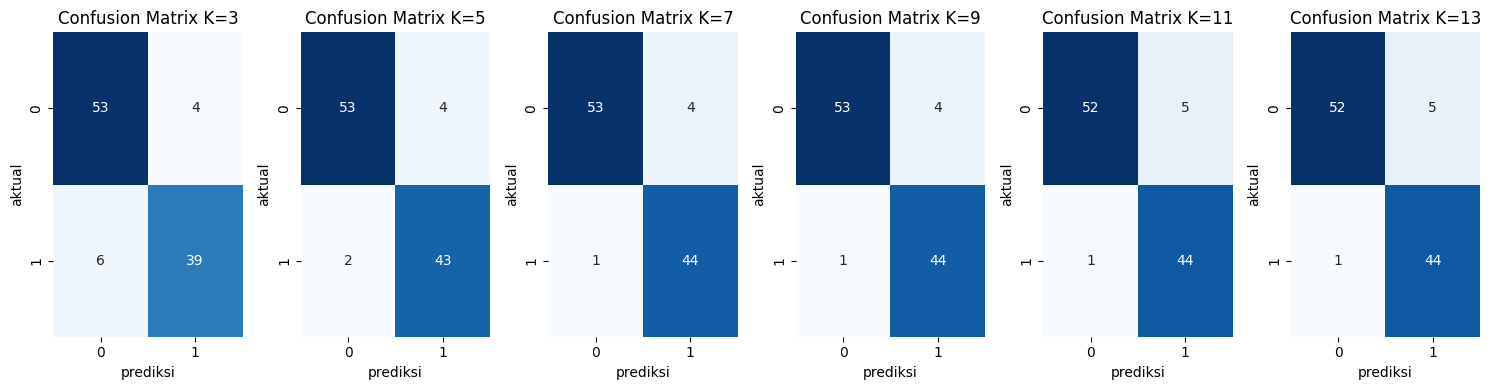



		============================METRIC EVALUASI DATA FOLD KE-2============================
    k  akurasi  presisi  recall    f1
0   3     0.90     0.91    0.87  0.89
1   5     0.94     0.91    0.96  0.93
2   7     0.95     0.92    0.98  0.95
3   9     0.95     0.92    0.98  0.95
4  11     0.94     0.90    0.98  0.94
5  13     0.94     0.90    0.98  0.94


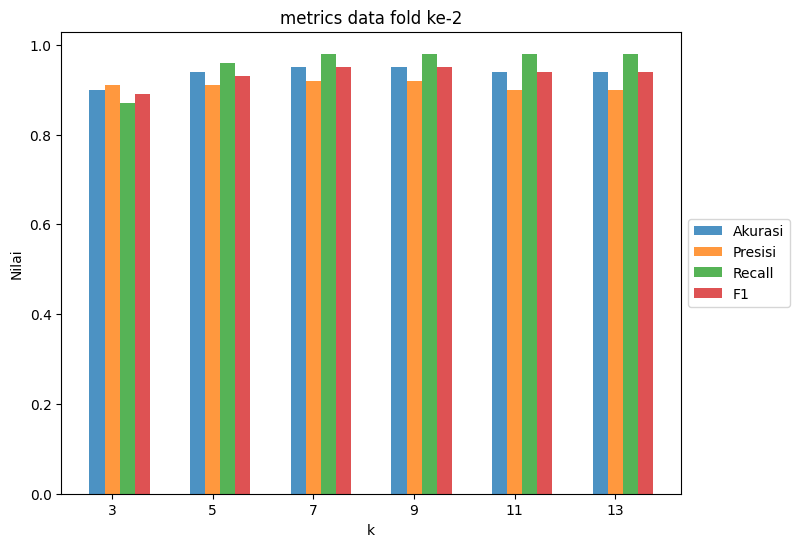


		============================DATA TRAINING KE-3============================
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.24  1.0           0.33       0.70         0.48        0.0         0.5   
1    0.43  0.0           0.67       0.80         0.30        0.0         0.5   
2    0.18  1.0           0.33       0.65         0.47        0.0         1.0   
3    0.41  0.0           0.00       0.69         0.35        0.0         0.5   
4    0.53  1.0           0.67       0.75         0.32        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.35  1.0           1.00       0.55         0.44        0.0         0.5   
914  0.82  1.0           0.00       0.72         0.32        1.0         0.5   
915  0.59  1.0           0.00       0.65         0.22        0.0         0.5   
916  0.59  0.0           0.33       0.65         0.39        0.0         0.0   
917  0.20  1.0           0.67       0.69  

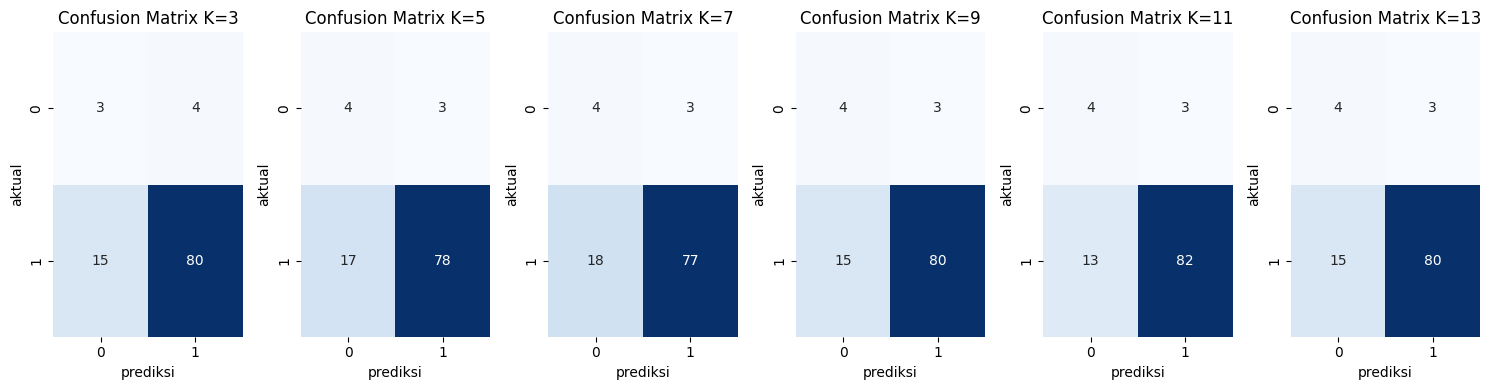



		============================METRIC EVALUASI DATA FOLD KE-3============================
    k  akurasi  presisi  recall    f1
0   3     0.81     0.95    0.84  0.89
1   5     0.80     0.96    0.82  0.89
2   7     0.79     0.96    0.81  0.88
3   9     0.82     0.96    0.84  0.90
4  11     0.84     0.96    0.86  0.91
5  13     0.82     0.96    0.84  0.90


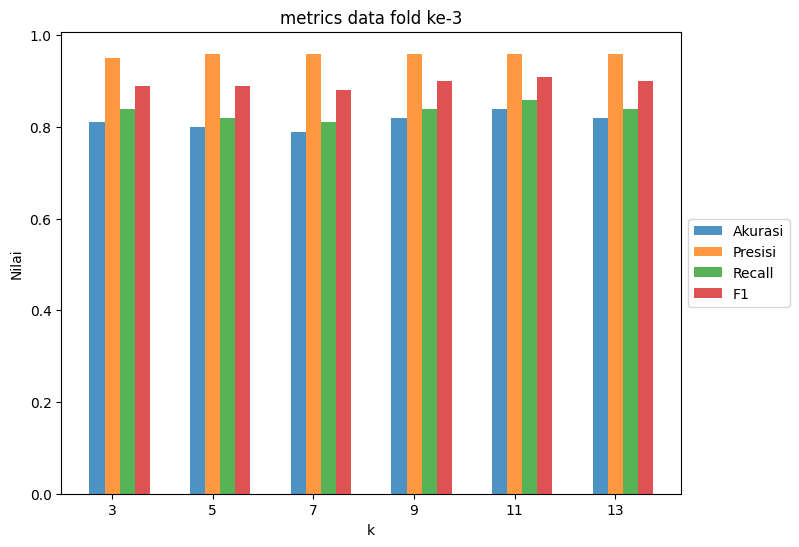


		============================DATA TRAINING KE-4============================
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.24  1.0           0.33       0.70         0.48        0.0         0.5   
1    0.43  0.0           0.67       0.80         0.30        0.0         0.5   
2    0.18  1.0           0.33       0.65         0.47        0.0         1.0   
3    0.41  0.0           0.00       0.69         0.35        0.0         0.5   
4    0.53  1.0           0.67       0.75         0.32        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.35  1.0           1.00       0.55         0.44        0.0         0.5   
914  0.82  1.0           0.00       0.72         0.32        1.0         0.5   
915  0.59  1.0           0.00       0.65         0.22        0.0         0.5   
916  0.59  0.0           0.33       0.65         0.39        0.0         0.0   
917  0.20  1.0           0.67       0.69  

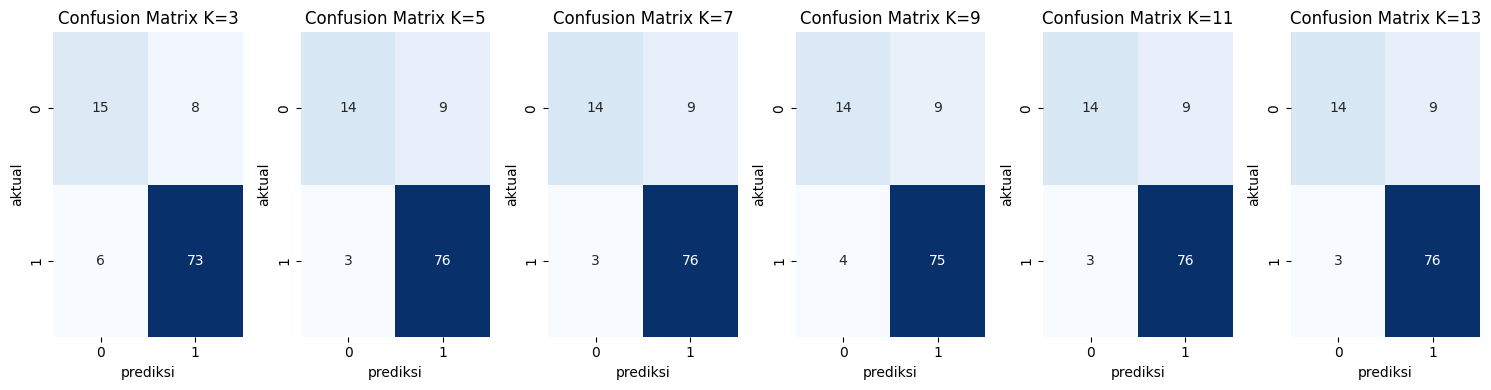



		============================METRIC EVALUASI DATA FOLD KE-4============================
    k  akurasi  presisi  recall    f1
0   3     0.86     0.90    0.92  0.91
1   5     0.88     0.89    0.96  0.93
2   7     0.88     0.89    0.96  0.93
3   9     0.87     0.89    0.95  0.92
4  11     0.88     0.89    0.96  0.93
5  13     0.88     0.89    0.96  0.93


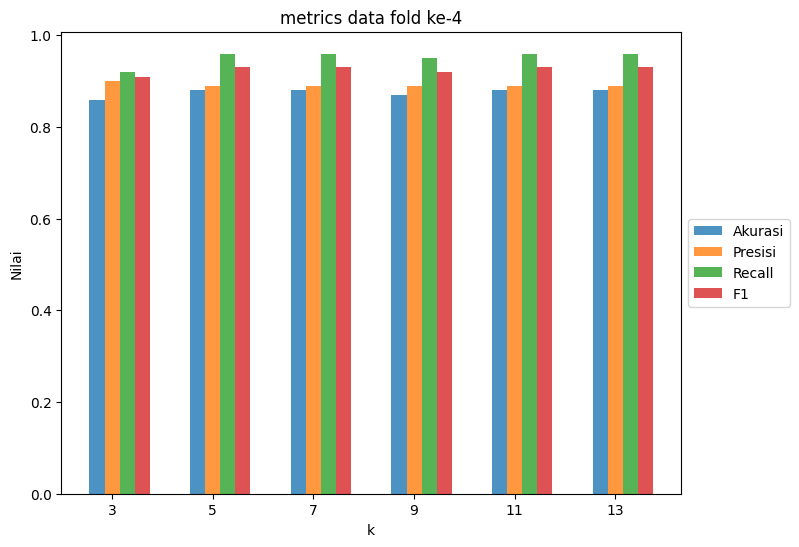


		============================DATA TRAINING KE-5============================
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.24  1.0           0.33       0.70         0.48        0.0         0.5   
1    0.43  0.0           0.67       0.80         0.30        0.0         0.5   
2    0.18  1.0           0.33       0.65         0.47        0.0         1.0   
3    0.41  0.0           0.00       0.69         0.35        0.0         0.5   
4    0.53  1.0           0.67       0.75         0.32        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.35  1.0           1.00       0.55         0.44        0.0         0.5   
914  0.82  1.0           0.00       0.72         0.32        1.0         0.5   
915  0.59  1.0           0.00       0.65         0.22        0.0         0.5   
916  0.59  0.0           0.33       0.65         0.39        0.0         0.0   
917  0.20  1.0           0.67       0.69  

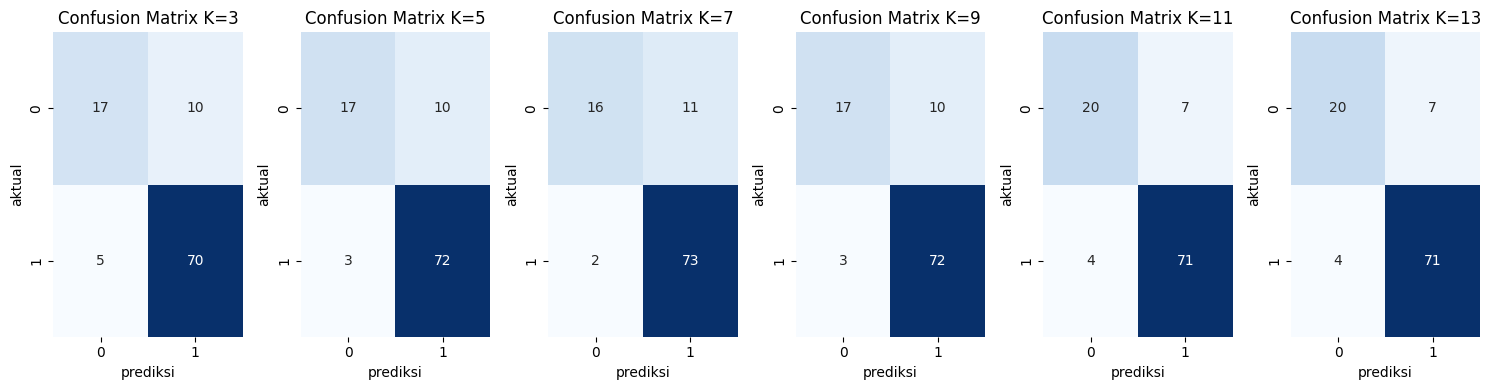



		============================METRIC EVALUASI DATA FOLD KE-5============================
    k  akurasi  presisi  recall    f1
0   3     0.85     0.88    0.93  0.90
1   5     0.87     0.88    0.96  0.92
2   7     0.87     0.87    0.97  0.92
3   9     0.87     0.88    0.96  0.92
4  11     0.89     0.91    0.95  0.93
5  13     0.89     0.91    0.95  0.93


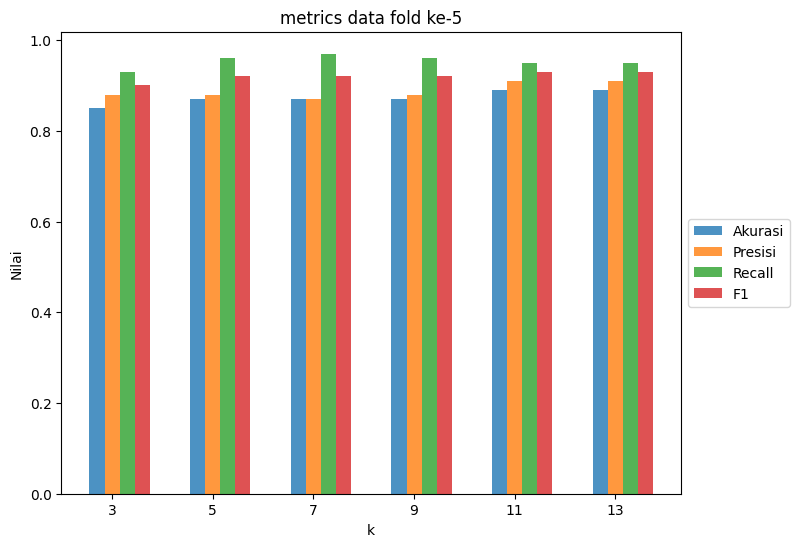


		============================DATA TRAINING KE-6============================
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.24  1.0           0.33       0.70         0.48        0.0         0.5   
1    0.43  0.0           0.67       0.80         0.30        0.0         0.5   
2    0.18  1.0           0.33       0.65         0.47        0.0         1.0   
3    0.41  0.0           0.00       0.69         0.35        0.0         0.5   
4    0.53  1.0           0.67       0.75         0.32        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.35  1.0           1.00       0.55         0.44        0.0         0.5   
914  0.82  1.0           0.00       0.72         0.32        1.0         0.5   
915  0.59  1.0           0.00       0.65         0.22        0.0         0.5   
916  0.59  0.0           0.33       0.65         0.39        0.0         0.0   
917  0.20  1.0           0.67       0.69  

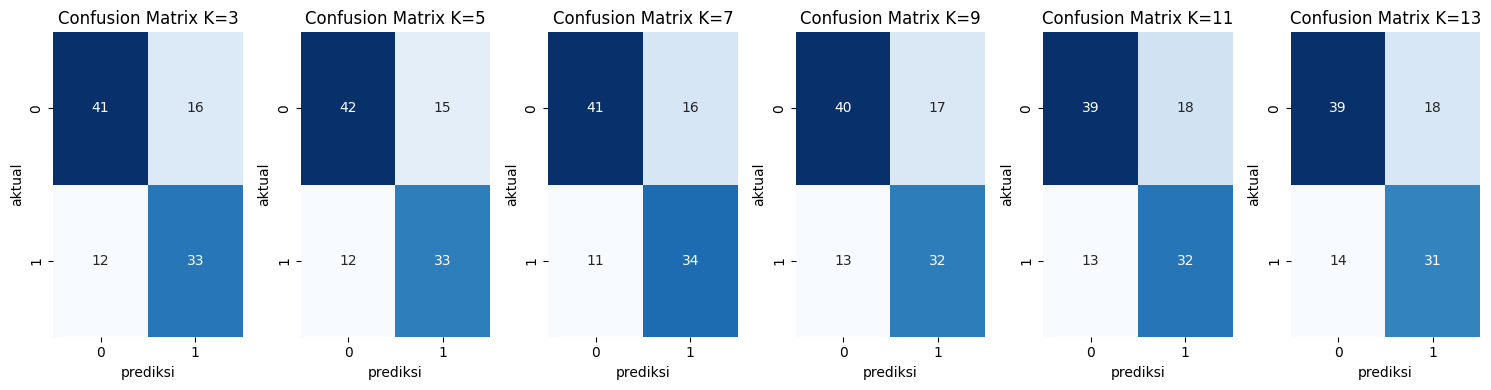



		============================METRIC EVALUASI DATA FOLD KE-6============================
    k  akurasi  presisi  recall    f1
0   3     0.73     0.67    0.73  0.70
1   5     0.74     0.69    0.73  0.71
2   7     0.74     0.68    0.76  0.72
3   9     0.71     0.65    0.71  0.68
4  11     0.70     0.64    0.71  0.67
5  13     0.69     0.63    0.69  0.66


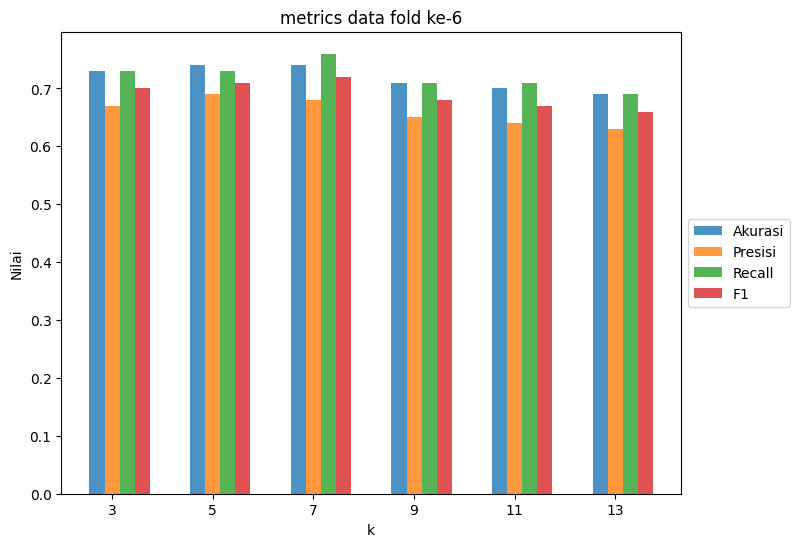


		============================DATA TRAINING KE-7============================
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.24  1.0           0.33       0.70         0.48        0.0         0.5   
1    0.43  0.0           0.67       0.80         0.30        0.0         0.5   
2    0.18  1.0           0.33       0.65         0.47        0.0         1.0   
3    0.41  0.0           0.00       0.69         0.35        0.0         0.5   
4    0.53  1.0           0.67       0.75         0.32        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
913  0.35  1.0           1.00       0.55         0.44        0.0         0.5   
914  0.82  1.0           0.00       0.72         0.32        1.0         0.5   
915  0.59  1.0           0.00       0.65         0.22        0.0         0.5   
916  0.59  0.0           0.33       0.65         0.39        0.0         0.0   
917  0.20  1.0           0.67       0.69  

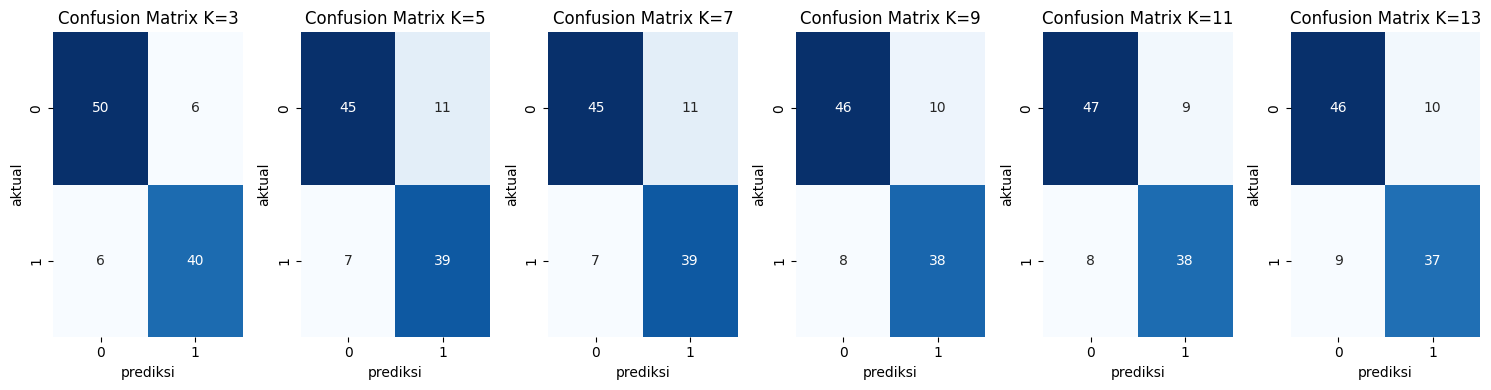



		============================METRIC EVALUASI DATA FOLD KE-7============================
    k  akurasi  presisi  recall    f1
0   3     0.88     0.87    0.87  0.87
1   5     0.82     0.78    0.85  0.81
2   7     0.82     0.78    0.85  0.81
3   9     0.82     0.79    0.83  0.81
4  11     0.83     0.81    0.83  0.82
5  13     0.81     0.79    0.80  0.80


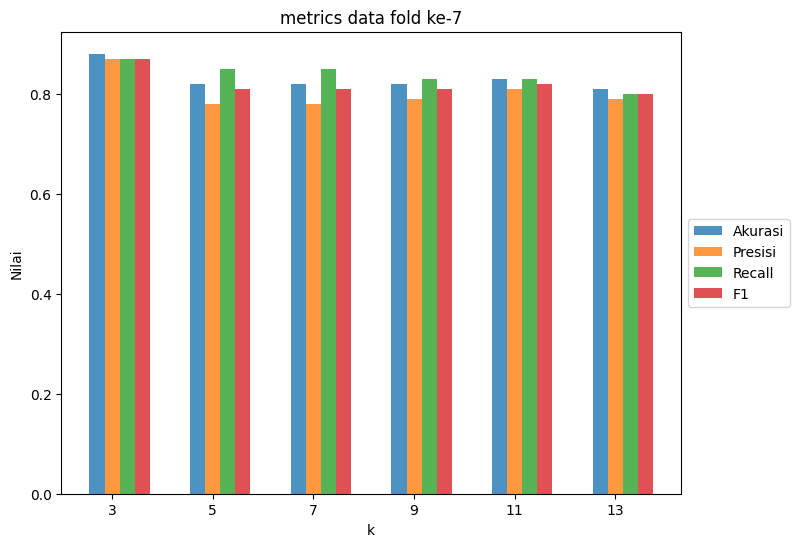


		============================DATA TRAINING KE-8============================
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0    0.24  1.0           0.33       0.70         0.48        0.0         0.5   
1    0.43  0.0           0.67       0.80         0.30        0.0         0.5   
2    0.18  1.0           0.33       0.65         0.47        0.0         1.0   
3    0.41  0.0           0.00       0.69         0.35        0.0         0.5   
4    0.53  1.0           0.67       0.75         0.32        0.0         0.5   
..    ...  ...            ...        ...          ...        ...         ...   
811  0.61  0.0           0.00       0.50         0.41        0.0         0.0   
812  0.53  0.0           0.67       0.55         0.35        0.0         0.5   
813  0.84  0.0           1.00       0.70         0.40        0.0         0.5   
814  1.00  1.0           0.00       0.62         0.50        0.0         0.0   
815  0.82  1.0           0.67       0.59  

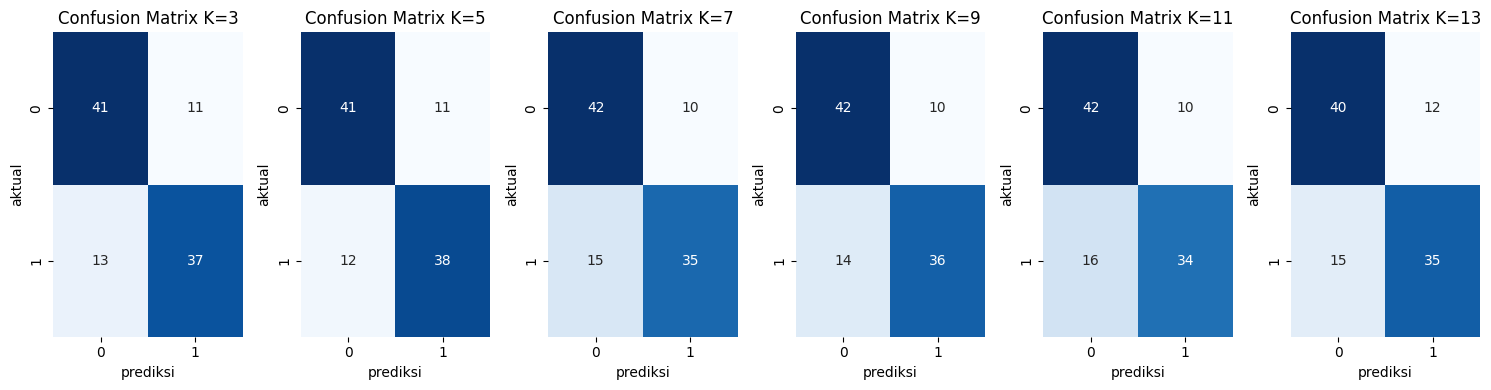



		============================METRIC EVALUASI DATA FOLD KE-8============================
    k  akurasi  presisi  recall    f1
0   3     0.76     0.77    0.74  0.76
1   5     0.77     0.78    0.76  0.77
2   7     0.75     0.78    0.70  0.74
3   9     0.76     0.78    0.72  0.75
4  11     0.75     0.77    0.68  0.72
5  13     0.74     0.74    0.70  0.72


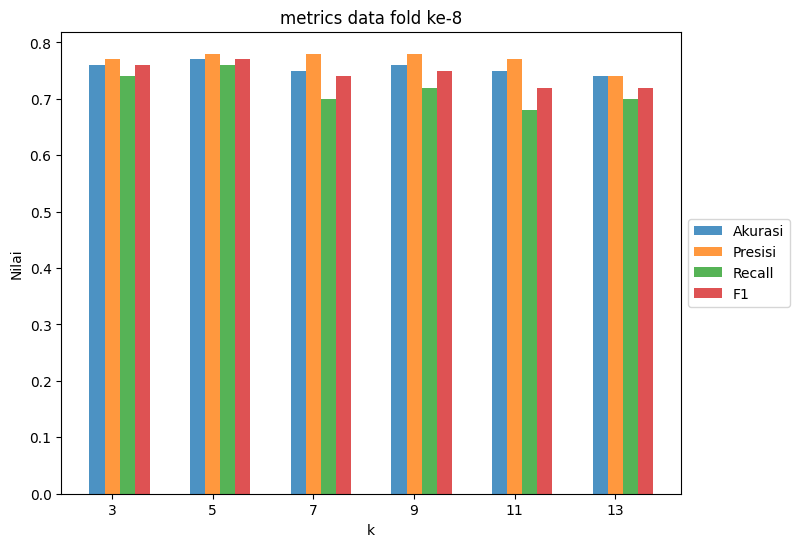

In [9]:
#menjalankan algoritma KNN
for i in range(len(fold)):
    #data training
    print(f"\n\t\t============================DATA TRAINING KE-{i}============================")
    data_training = DataTrainig(fold[i], dataset)
    print(data_training)

    #data testing
    print(f"\n\t\t============================DATA TESTING KE-{i}============================")
    data_testing = fold[i]
    print(data_testing)

    #Split fitur dataset
    column_target = "HeartDisease"
    X_train, X_test, y_train, y_test = Feature(data_training, data_testing, column_target)
    
    #mencari jarak terdekat
    nearest, indeks = Nearest(X_test, X_train, y_train, maks_K)
    # Melakukan klasifikasi menggunakan kNN untuk setiap nilai k
    y_pred = allPredict(k, X_train, y_train, X_test)
    # mencari jarak terdekat
    nearest_result = NearestResult(X_test, y_train, nearest, indeks)    
    #konversi data frame
    nearest_result = pd.DataFrame(nearest_result, columns=["Testing", "Training", "Jarak", "Kelas"])
    print(nearest_result)

    #klasifikasi berdasarkan jarak terdekat
    predict_column = ["K" + str(val) for val in k] # Membuat dictionary kolom
    predict = pd.DataFrame(np.transpose(y_pred), columns=predict_column) # Membuat dataframe
    classification = Classification(X_test, predict, y_test) # Hasil klasifikasi
    print(classification)

    #akurasi, presisi, recall, f1, cm
    accuracy, precission, recall, f1, cm = Metrics(y_test, predict)
    #TN, FP, TP, T, F
    TN, FP, FN, TP, T, F = CMValue(cm)
    #ilai CM
    cm_value = pd.DataFrame({'k': k, 'TN': TN, 'FP': FP, 'FN': FN, 'TP': TP, 'T': T, 'F': F})
    
    #confusion matrix data ke fold ke-i 
    print(f"\n\t\t============================CONFUSION MATRIX DATA FOLD KE-{i}============================")
    print(cm_value)
    #visualisasi confusion matrix
    CMVisualization(cm, k)

    #metrik fold ke-i
    metrics_per_fold = pd.DataFrame({'k': k,'akurasi': accuracy, 'presisi': precission, 'recall': recall, 'f1': f1})
    print(f"\n\t\t============================METRIC EVALUASI DATA FOLD KE-{i}============================")
    print(metrics_per_fold)
    title = f"metrics data fold ke-{i}"
    #viasualisasi metric evaluasi
    MetricsVisualization(metrics_per_fold, title)

    #join semua hasil metric per fold
    if(i==0):
        metrics=metrics_per_fold
    else:
        metrics=pd.concat([metrics, metrics_per_fold], ignore_index=True)


		============================RATA-RATA NILAI METRIC EVALUASI============================
    k  akurasi  presisi  recall    f1
0   3     0.84     0.84    0.85  0.85
1   5     0.85     0.84    0.88  0.85
2   7     0.84     0.84    0.87  0.85
3   9     0.84     0.84    0.87  0.85
4  11     0.85     0.84    0.87  0.85
5  13     0.84     0.83    0.86  0.85


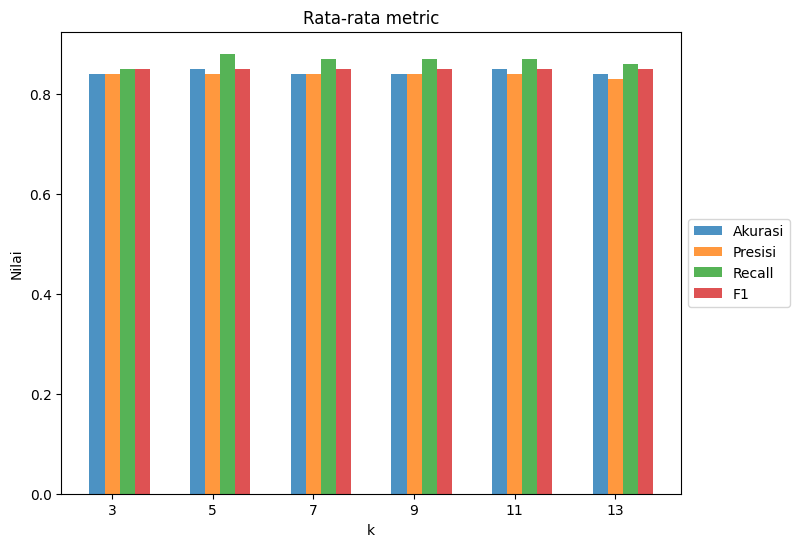

In [10]:
#rata2 metrics
#nilai desimal dua digit
avg_accuracy = round(metrics.groupby('k')['akurasi'].mean(),2)
avg_accuracy = avg_accuracy.reset_index(drop=True)
avg_precission = round(metrics.groupby('k')['presisi'].mean(),2)
avg_precission = avg_precission.reset_index(drop=True)
avg_recall = round(metrics.groupby('k')['recall'].mean(),2)
avg_recall = avg_recall.reset_index(drop=True)
avg_f1 = round(metrics.groupby('k')['f1'].mean(),2)
avg_f1 = avg_f1.reset_index(drop=True)
k=pd.DataFrame({'k':k})
avg_metrics =  pd.concat([k, avg_accuracy, avg_precission, avg_recall, avg_f1], axis=1)
print("\n\t\t============================RATA-RATA NILAI METRIC EVALUASI============================")
print(avg_metrics)
title = "Rata-rata metric"
MetricsVisualization(avg_metrics, title)